<font size="5"> Solution to 1(a) </font>

We are first asked to find the Hessian of $J(\theta) = \frac{-1}{m} \sum_{i=1}^m y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)}))$. We will be replacing $h_\theta(x^{(i)})$ with $g(\theta^T x^{(i)})$ where $g(z) = \frac{1}{1 + e^{-z}}$ so that we can make the work a bit cleaner by exploiting the fact that $g'(z) = g(z)(1 - g(z))$.

Firstly, let's start by computing $\frac{\partial}{\partial \theta_j} J(\theta)$. We have:

\begin{align*}

\frac{\partial}{\partial \theta_j} J(\theta) &= \frac{-1}{m} \sum_{i=1}^m \frac{\partial}{\partial \theta_j} y^{(i)} \log g(\theta^T x^{(i)}) + (1 - y^{(i)}) \log (1 - g(\theta^T x^{(i)})) \\
&= \frac{-1}{m} \sum_{i=1}^m y^{(i)} \frac{1}{g(\theta^T x^{(i)})} \frac{\partial}{\partial \theta_j} g(\theta^T x^{(i)}) + (1 - y^{(i)}) \frac{1}{1 - g(\theta^T x^{(i)})} \frac{\partial}{\partial \theta_j} (1 - g(\theta^T x^{(i)})) \\
&= \frac{-1}{m} \sum_{i=1}^m y^{(i)} \frac{1}{g(\theta^T x^{(i)})} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} (\theta^T x^{(i)}) - (1 - y^{(i)}) \frac{1}{1 - g(\theta^T x^{(i)})} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} (-\theta^T x^{(i)}) \\
&= \frac{-1}{m} \sum_{i=1}^m y^{(i)} \frac{1}{g(\theta^T x^{(i)})} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) x_j^{(i)} - (1 - y^{(i)}) \frac{1}{1 - g(\theta^T x^{(i)})} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) (-x_j^{(i)}) \\
&= \frac{-1}{m} \sum_{i=1}^m y^{(i)} (1 - g(\theta^T x^{(i)})) x_j^{(i)} - (1 - y^{(i)}) g(\theta^T x^{(i)}) x_j^{(i)} \\
&= \frac{-1}{m} \sum_{i=1}^m (y^{(i)} - g(\theta^T x^{(i)})) x_j^{(i)}
\end{align*}

Finally, we do one more partial derivative to get the Hessian:

\begin{align*}

H_{kj} &= \frac{\partial}{\partial \theta_k} \frac{\partial}{\partial \theta_j} J(\theta) \\
&= \frac{-1}{m} \sum_{i=1}^m \frac{\partial}{\partial \theta_k} (y^{(i)} - g(\theta^T x^{(i)})) x_j^{(i)} \\
&= \frac{-1}{m} \sum_{i=1}^m \frac{\partial}{\partial \theta_k} (-g(\theta^T x^{(i)}) x_j^{(i)}) \\
&= \frac{1}{m} \sum_{i=1}^m g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) x_k^{(i)} x_j^{(i)} 

\end{align*}

Finally, we are asked to prove that $H$ is such that $z^T H z \geq 0$ for all $z$. Start by noting that $Hz$ is just another vector, say $v$. Then $z^T H z = z^T v = \sum_{k} z_k v_k$. Note that $v_k = \sum_{j} H_{kj} z_j$. So we have:

\begin{align*}
z^T H z &= \sum_{k} z_k \sum_{j} H_{kj} z_j \\
&= \sum_{k} z_k \sum_{j} \frac{1}{m} \sum_{i} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) x_j^{(i)} x_k^{(i)} z_j \\
&= \frac{1}{m} \sum_{i} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) \sum_{k} \sum_{j} z_k x_k^{(i)} z_j x_j^{(i)}  \\
&= \frac{1}{m} \sum_{i} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) ((x^{(i)})^T z)^2 \\
&\geq 0

\end{align*}

We used the fact that $\sum_{k} \sum_{j} z_k x_k^{(i)} z_j x_j^{(i)} = ((x^{(i)})^T z)^2$. This is true because $\sum_{k} \sum_{j} z_k x_k^{(i)} z_j x_j^{(i)} = \sum_{k} z_k x_k^{(i)} \sum_{j} z_j x_j^{(i)} = ((x^{(i)})^T z)^2$. Furthermore, we used the fact that $g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) \geq 0$. But this is true because $g(\theta^T x^{(i)}) \in [0, 1]$ and therefore $1 - g(\theta^T x^{(i)}) \in [0, 1]$ as well. So the second to last line is above is a sum of non-negative numbers, and therefore the result is something non-negative.

Note that for the next question, a different presentation of the gradient and Hessian is used for computations. If we define the matrix X to be the matrix whose rows are the $x^{(i)}$ vectors, then the gradient is:


$$\nabla J(\theta) = \frac{1}{m} X^T (g(X \theta) - y)$$

This can be seen by noting that the rows of $X \theta$ are precisely $\sum_{j} \theta_j x_j^{(i)}$, and our notation $g(X \theta)$ means apply the sigmoid function to each element of $X \theta$, so $g(X \theta)_i = g(\theta^T x^{(i)})$. Then $(g(X \theta) - y)_i = g(\theta^T x^{(i)}) - y^{(i)}$. Finally, note that $(X^T (g(X \theta) - y))_j = \sum_{i} (X^T)_{j i} (g(X \theta) - y)_i = \sum_{i} x_j^{(i)} (g(\theta^T x^{(i)}) - y^{(i)})$, which agrees with the formula above (when accounting for a factor of m).

Similarly, the Hessian is given by:

$$H = \frac{1}{m} X^T D X$$

where $D$ is a diagonal matrix with $D_{ii} = g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)}))$. This is equivalent to the previous formula because $DX$ is just $X$ but with row i multiplied by $g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)}))$. Then $(X^T DX)_{k j} = \sum_{i=1}^m (X^T)_{k i} (DX)_{i j}$. But $(X^T)_{k i}$ is precisely the $k$ th feature of $x^{(i)}$, and $(DX)_{i j}$ is precisely $g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) x_j^{(i)}$. So $(X^T DX)_{k j} = \sum_{i=1}^m g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)})) x_k^{(i)} x_j^{(i)}$, which is the formula above (when accounting for a factor of m).

<font size="5"> Solution to 1(b) </font>

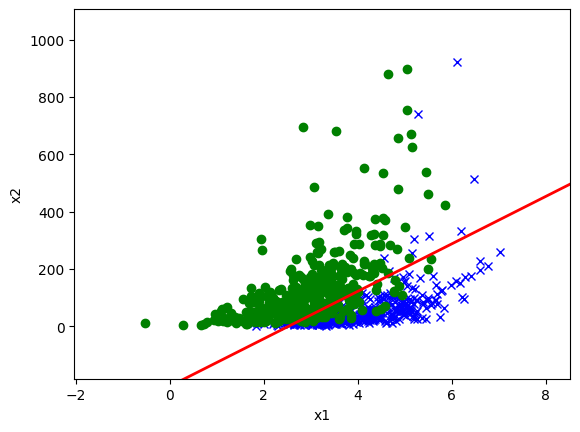

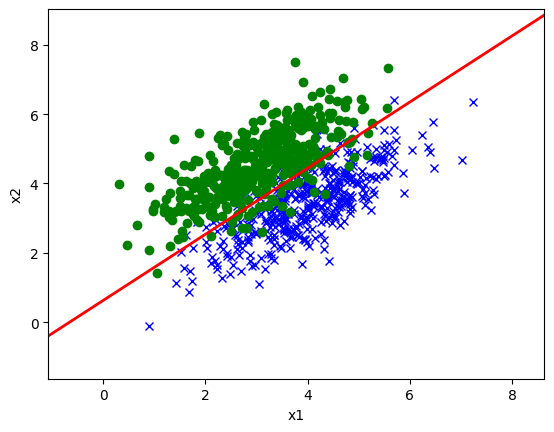

In [18]:
import numpy as np
import util

from linear_model import LinearModel

# Solution to 1(b)

def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***

    # Instantiate LogisticRegression
    clf = LogisticRegression()
    # Train the classifier
    clf.fit(x_train, y_train)
    # Import the evaluation data
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    # Make predictions on the evaluation data
    y_pred = clf.predict(x_eval)
    # Plot the decision boundary on the validation data
    util.plot(x_train, y_train, clf.theta)
    # Use np.savetxt to save predictions on eval set to pred_path
    np.savetxt(pred_path, y_pred)

    # *** END CODE HERE ***


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***

        # Initial value of theta is the zero vector as requested in the problem
        theta = np.zeros(x.shape[1])
        # Update theta until the stopping condition is met
        while True:
            # First find h_theta, this is an m x 1 vector where ith entry is g(theta^T x^(i))
            h_theta = 1 / (1 + np.exp(-x @ theta))
            # multiplication and subtraction are elementwise, then convert into diagonal matrix with np.diag
            D = np.diag(h_theta * (1 - h_theta))
            # Compute the Hessian using the formula H = 1/m * X^T D X
            H = x.T @ D @ x / x.shape[0]
            # Compute the gradient using the formula g = 1/m * X^T (h_theta - y)
            g = x.T @ (h_theta - y) / x.shape[0]
            # Make a copy of theta before updating it
            old_theta = np.copy(theta)
            # Compute the new theta using the update rule theta = theta - H^(-1) g
            theta = theta - np.linalg.inv(H) @ g
            # Check if the stopping condition is met
            if np.linalg.norm(theta - old_theta) < self.eps:
                break
        # Update theta
        self.theta = theta

        # *** END CODE HERE ***

            

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***

        # Apply the trained theta to the inputs and apply sigmoid elementwise to get prediction vector
        return 1 / (1 + np.exp(-x @ self.theta))

        # *** END CODE HERE ***

if __name__ == '__main__':
    main('../data/ds1_train.csv', '../data/ds1_valid.csv', './output/1b_pred_1.txt')
    main('../data/ds2_train.csv', '../data/ds2_valid.csv', './output/1b_pred_2.txt')



In [19]:
%%latex

<font size="5"> Solution to 1(c) </font>

\begin{align*}
p(y=1 \mid x) &= \frac{p(x \mid y=1) p(y=1)}{p(x)} \\
&= \frac{p(x \mid y = 1) p(y = 1)}{p(x \mid y = 0) p(y = 0) + p(x \mid y = 1) p(y = 1)} \\
&= \frac{p(x \mid y = 1) \phi}{p(x \mid y = 0)(1 - \phi) + p(x \mid y = 1) \phi} \\
&= \frac{1}{1 + \frac{p(x \mid y = 0)}{p(x \mid y = 1)} \times \frac{1 - \phi}{\phi}}
\end{align*}

Let's  simplify the denominator a bit.

\begin{align*}
\frac{p(x \mid y = 0)}{p(x \mid y = 1)} &= \frac{\exp (-0.5 (x - \mu_0)^T \Sigma^{-1}(x - \mu_0))}{\exp (-0.5 (x - \mu_1)^T \Sigma^{-1} (x - \mu_1))} \\
&= \frac{\exp (-0.5 x^T \Sigma^{-1} x + \mu_0^T \Sigma^{-1} x - 0.5 \mu_0^T \Sigma^{-1} \mu_0)}{\exp (-0.5 x^T \Sigma^{-1} x + \mu_1^T \Sigma^{-1} x - 0.5 \mu_1^T \Sigma^{-1} \mu_1)} \\
&= \exp (-0.5 \mu_0^T \Sigma^{-1} \mu_0 + 0.5 \mu_1^T \Sigma^{-1} \mu_1 + \mu_0^T \Sigma^{-1} x - \mu_1^T \Sigma^{-1} x) \\
&= \exp ((\mu_0^T \Sigma^{-1} - \mu_1^T \Sigma^{-1})x + 0.5\mu_1^T \Sigma^{-1}\mu_1 - 0.5\mu_0^T \Sigma^{-1} \mu_0) \\
\end{align*}

Note that in the above, we exploited the fact that $\Sigma$ is a symmetric matrix (so its inverse is also symmetric), hence we could use $\mu_0^T \Sigma^{-1} x = x^T \Sigma \mu_0^T$.

Also note that 

\begin{align*}
\frac{1 - \phi}{\phi} = \exp\left(\log\left(\frac{1 - \phi}{\phi}\right)\right)
\end{align*}

Substituting these results back to $p(y = 1 \mid x)$, find that $\theta = -\mu_0^T \Sigma^{-1} + \mu_1^T \Sigma^{-1}$ and $\theta_0 = -0.5\mu_1^T \Sigma^{-1}\mu_1 + 0.5\mu_0^T \Sigma^{-1} \mu_0 - \log(\frac{1 - \phi}{\phi})$. So indeed we can say that the GDA results in a linear decision boundary.

<IPython.core.display.Latex object>

<font size="5"> Solution to 1(d) </font>

First tackle the maximum likelihood estimation of $\phi$.

\begin{align*}
\ell &= \log \prod_{i=1}^m p(y^{(i)} \mid x^{(i)}) p(y^{(i)}) \\
&= \sum_{i=1}^m \log p(y^{(i)} \mid x^{(i)}) + \log p(y^{(i)}) \\
\Rightarrow \frac{\partial \ell}{\partial \phi} 
&= \sum_{i=1}^m \frac{1}{p(y^{(i)})}\frac{\partial p(y^{(i)})}{\partial \phi} \\ 
&= \sum_{i=1}^m \frac{1}{\phi} \cdot 1 \{y^{(i)} = 1\} - \sum_{i = 1}^m \left(\frac{1}{1 - \phi}\right) 1\{ y^{(i)} = 0\} \\
\end{align*}

Setting $\frac{\partial \ell}{\partial \phi} = 0$:

\begin{align*}
0 &= \sum_{i=1}^m \frac{1}{\phi} \cdot 1 \{y^{(i)} = 1\} - \sum_{i = 1}^m \left(\frac{1}{1 - \phi}\right) 1\{ y^{(i)} = 0\} \\
&= (1 - \phi) \sum_{i}^m 1 \{y^{(i)} = 1\} - \phi \sum_{i}^m 1 \{y^{(i)} = 0\} \\ 
&= \sum_{i=1}^m 1 \{y^{(i)} = 1\} - \phi \underbrace{\sum_{i=1}^m 1 \{y^{(i)} = 0\} + 1 \{y^{(i)} = 1\}}_{=m} \\
\Rightarrow m \phi &= \sum_{i=1}^m 1\{y^i=1\} \\
\phi &= \frac{1}{m} \sum_{i=1}^m 1\{y^i=1\} 
\end{align*}

Now, let's tackle the maximum likelihood estimation of $\mu_0$ and $\mu_1$. The argument for each is similar, so we'll just do it for $\mu_0$.

\begin{align*}
\ell &= \sum_{i=1}^m \log p(x^{(i)} \mid y^{(i)}) + \log p(y^{(i)}) \\ 
\Rightarrow \frac{\partial \ell}{\partial \mu_0} &= \sum_{i=1}^m \frac{1}{p(x^{(i)} \mid y^{(i)})} \frac{\partial }{\partial \mu_0}p(x^{(i)} \mid y^{(i)}) \\
&= \sum_{i=1}^m (2 \pi)^n |\Sigma|^{0.5} \exp(0.5 (x^{(i)} - \mu_0)^2 \Sigma^{-1}) \frac{\partial}{\partial \mu_0}p(x^{(i)} \mid y^{(i)})1\{y^{(i)} = 0\} \\
\end{align*}

We need to compute $\frac{\partial}{\partial \mu_0}p(x^{(i)} \mid y^{(i)})$ and then substitute the result back into the above equation.

\begin{align*}
\frac{\partial}{\partial \mu_0}p(x^{(i)} \mid y^{(i)}) &= \frac{\partial}{\partial \mu_0} \frac{1}{(2 \pi)^n |\Sigma|^{0.5}} \exp(-0.5 (x^{(i)} - \mu_0)^2 \Sigma^{-1}) \\
&= \frac{1}{(2 \pi)^n |\Sigma|^{0.5}} \exp(-0.5 (x^{(i)} - \mu_0)^2 \Sigma^{-1}) \frac{\partial}{\partial \mu_0} (-0.5 (x^{(i)} - \mu_0)^2 \Sigma^{-1}) \\
&= \frac{1}{(2 \pi)^n |\Sigma|^{0.5}} \exp(-0.5 (x^{(i)} - \mu_0)^2 \Sigma^{-1}) ((x^{(i)}-\mu_0) \Sigma^{-1}) \\
\end{align*}

Substituting this result back and setting $\frac{\partial \ell}{\partial \mu_0} = 0$:

\begin{align*}
0 &= \sum_{i=1}^m (x^{(i)}-\mu_0) \Sigma^{-1} 1\{y^{(i)} = 0\} \\
\Rightarrow \mu_0 &= \frac{\sum_{i=1}^m 1\{y^{(i)} = 0\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)} = 0\}} 
\end{align*}

%%latex

1(d) continued

Finally, we compute the maximum likelihood estimation of $\Sigma$. Since this part of the question assumes we are in one dimension, $\Sigma$ is just a (positive) scalar.

\begin{align*}
\frac{\partial \ell}{\partial \Sigma} &= \sum_{i=1}^m \frac{1}{p(x^{(i) \mid }y^{(i)})} \frac{\partial}{\partial \Sigma} p(x^{(i)} \mid y^{(i)})
\end{align*}

Note that $p(x^{(i)} \mid y^{(i)})$ (when viewed as a function of $\Sigma$ can be written as $g(\Sigma)h(\Sigma)$, where $g(\Sigma) = (2 \pi)^{-n/2} \Sigma^{-1/2}$ and $h(\Sigma) = \exp(-0.5 (x^{(i)} - \mu_{y^{(i)}})^2 \Sigma^{-1})$. We can then compute the derivatives of $g(\Sigma)$ and $h(\Sigma)$ separately and then use them in the product rule to compute the derivative of $p(x^{(i)} \mid y^{(i)})$.

\begin{align*}
\frac{\partial}{\partial \Sigma} g(\Sigma) &= \frac{\partial}{\partial \Sigma} (2 \pi)^{-n/2} \Sigma^{-1/2} \\
&= -\frac{1}{2} (2 \pi)^{-n/2} \Sigma^{-3/2} \\
\frac{\partial}{\partial \Sigma} h(\Sigma) &= \frac{\partial}{\partial \Sigma} \exp(-0.5 (x^{(i)} - \mu_{y^{(i)}})^2 \Sigma^{-1}) \\
&= 0.5 (x^{(i)} - \mu_{y^{(i)}})^2 \Sigma^{-2}\exp(-0.5 (x^{(i)} - \mu_{y^{(i)}})^2 \Sigma^{-1})
\end{align*}

Substituting these results back into the equation for $\frac{\partial \ell}{\partial \Sigma}$:

\begin{align*}
\frac{\partial \ell}{\partial \Sigma} &= \sum_{i=1}^m \frac{1}{p(x^{(i)} \mid y^{(i)})} \frac{\partial}{\partial \Sigma} p(x^{(i)} \mid y^{(i)}) \\
&= \sum_{i=1}^m \frac{1}{p(x^{(i)} \mid y^{(i)})} \frac{\partial}{\partial \Sigma} g(\Sigma) h(\Sigma) \\
&= \sum_{i=1}^m \frac{1}{p(x^{(i)} \mid y^{(i)})}(g(\Sigma) \frac{\partial}{\partial \Sigma} h(\Sigma) + h(\Sigma) \frac{\partial}{\partial \Sigma} g(\Sigma)) \\
\end{align*}

There's a lot of terms and it's inconvenient to write it all out, but from the above line, there's a lot of cancellations of $\Sigma$ terms and exponentials. After simplifying, and setting $\frac{\partial \ell}{\partial \Sigma} = 0$, we get:

\begin{align*}
0 &= \sum_{i=1}^m-0.5 \Sigma^{-1} + \frac{1}{2} (x^{(i)} - \mu_{y^{(i)}})^2 \Sigma^{-2} 

\end{align*}

Which re-arranges to get the desired maximum likelihood estimator of $\Sigma = \frac{1}{m} \sum_{i=1}^m (x-\mu_{y^{(i)}})^2$

<font size="5"> Solution to 1(e) </font>

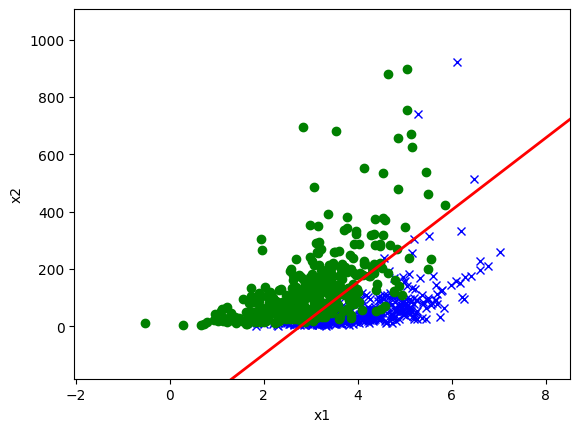

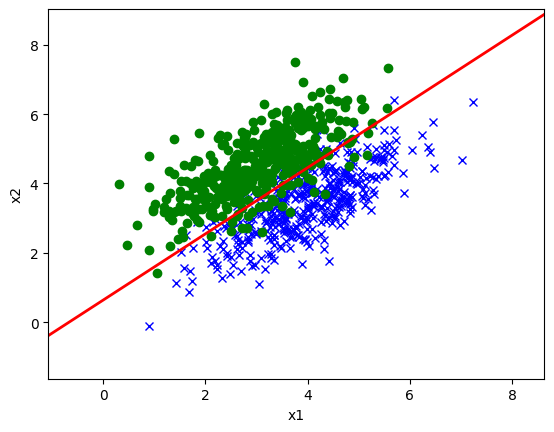

In [23]:
import numpy as np
import util

from linear_model import LinearModel

# Solution to Problem 1(e)

def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    
    # Train a GDA classifier
    clf = GDA()
    clf.fit(x_train, y_train)
    # Load the evaluation set
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    # Make predictions on the evaluation set
    y_pred = clf.predict(x_eval)
    # Print the plot of the decision boundary
    util.plot(x_train, y_train, clf.theta)
    # Use np.savetxt to save predictions on eval set to pred_path
    np.savetxt(pred_path, y_pred)

    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***

        # Compute mu_0, mu_1, sigma, and phi using the maximum likelihood estimates found in problem 1(d)
        m, n = x.shape
        phi = np.mean(y == 1)
        mu_0 = np.mean(x[y == 0], axis=0)
        mu_1 = np.mean(x[y == 1], axis=0)
        sigma = np.zeros((n, n))
        for i in range(m):
            if y[i] == 0:
                sigma += np.outer(x[i] - mu_0, x[i] - mu_0)
            else:
                sigma += np.outer(x[i] - mu_1, x[i] - mu_1)
        sigma = sigma / m

        # Compute theta
        theta = np.zeros(n + 1)
        # In part (c), we showed that p(y = 1 | x) = sigmoid(-(theta^T x + theta_0))
        theta[0] = np.log(phi / (1 - phi)) - 0.5 * (mu_1 @ np.linalg.inv(sigma) @ mu_1) + 0.5 * (mu_0 @ np.linalg.inv(sigma) @ mu_0)
        theta[1:] = np.linalg.inv(sigma) @ (mu_1 - mu_0)

        self.theta = theta


        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***

        z = x @ self.theta[1:]
        for i in range(len(z)):
            z[i] += self.theta[0]

        return 1/(1 + np.exp(-z))

        # *** END CODE HERE

if __name__ == '__main__':
    main(train_path='../data/ds1_train.csv', eval_path='../data/ds1_valid.csv', pred_path='output/1e_pred_1.txt')
    main(train_path='../data/ds2_train.csv', eval_path='../data/ds2_valid.csv', pred_path='output/1e_pred_2.txt')

<font size="5"> Solutions to 1(f) and 1(g) </font>

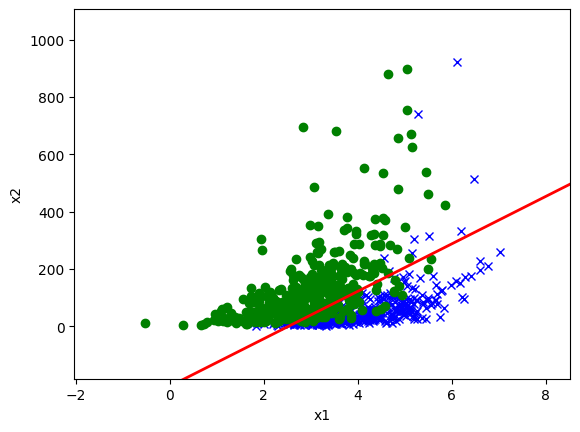

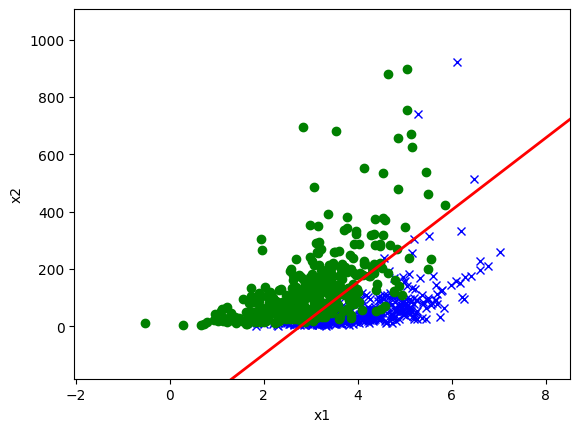

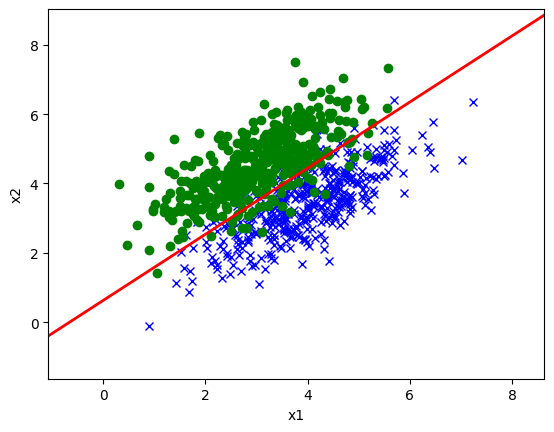

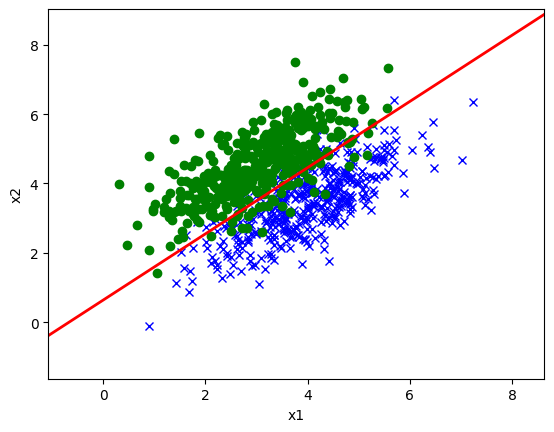

In [24]:
# Problem 1 (f) and (g):
# Compile all four diagrams as an output of this cell 

import numpy as np
import util

from linear_model import LinearModel



def main(train_path):
    clf1 = LogisticRegression()
    clf2 = GDA()

    # Load dataset
    x_train1, y_train1 = util.load_dataset(train_path, add_intercept=True)
    x_train2, y_train2 = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    
    # Train a GDA classifier
    clf1.fit(x_train1, y_train1)
    clf2.fit(x_train2, y_train2)
    # Print the plot of the decision boundary
    util.plot(x_train1, y_train1, clf1.theta)
    util.plot(x_train2, y_train2, clf2.theta)

if __name__ == '__main__':
    main(train_path='../data/ds1_train.csv')
    main(train_path='../data/ds2_train.csv')

In the above cell, the first image is training set 1 with logistic regression, and the second image is training set 2 with GDA, the third image is training set 2 with logistic regression, and the fourth image is training set 2 with GDA.

The reason that the second pair of plots look more similar to each other is because the data is probably Gaussian. As described in lecture 5 of cs229 (2018), GDA is like logistic regression but with stronger modelling assumptions (assuming that each of the classes of data are normally distributed), so it makes sense that when the data is Gaussian, the two decision boundaries are similar, but when they are not (presumably is the case in training set 1), the decision boundaries are different.

However, in the first pair of plots even though the decision boundaries are different, the one produced by GDA is still very useable and fairly accurate, so making some modelling assumptions (even when those assumptions are not true) can still be useful in producing a good model relatively quickly.